* ● This project will test your data science abilities as well as Machine learning modeling abilities ● you will find the dataset which is related to DDoS Attacks by following this link (https://www.kaggle.com/siddharthm1698/ddos-botnet-attack-on-iot-devices?select=DDoSdata.csv) Download this data 
*  ● The data is highly undistributed 
*  ● Convert every attribute data type into float data type so attributes require one hot encoding (label encoder) 
 


In [56]:
import numpy as np 
import pandas as pd
df = pd.read_csv("D:\Ajay Sharma ML\ML Assignment\ML Assignment No_5/DDoSdata_N.csv")
df.head()

C:\Users\omgha\AppData\Local\Temp\ipykernel_15536\4076157218.py:3: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\Ajay Sharma ML\ML Assignment\ML Assignment No_5/DDoSdata_N.csv")


,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1650261,1650261,1.528103e+09,e,1,tcp,1,192.168.100.150,54110,192.168.100.3,...,1.21662,40,38,1.56093,1.21662,328,308,1,DDoS,HTTP
1,1650262,1650262,1.528103e+09,e,1,tcp,1,192.168.100.150,54112,192.168.100.3,...,1.21662,40,38,1.56107,1.21662,328,308,1,DDoS,HTTP
2,1650263,1650263,1.528103e+09,e,1,tcp,1,192.168.100.150,54114,192.168.100.3,...,1.21662,40,38,1.24980,1.21662,328,308,1,DDoS,HTTP
3,1650264,1650264,1.528103e+09,e,1,tcp,1,192.168.100.150,54116,192.168.100.3,...,1.21662,40,38,1.24986,1.21662,328,308,1,DDoS,HTTP
4,1650265,1650265,1.528103e+09,e,1,tcp,1,192.168.100.150,54118,192.168.100.3,...,1.21662,40,38,1.24991,1.21662,328,308,1,DDoS,HTTP


In [57]:
data.shape

(1927101, 47)

In [58]:
df2 = df.drop(['Unnamed: 0', 'pkSeqID','stime','saddr', 'daddr', 'dport', 'ltime', 'dur','mean', 'stddev', 'sum', 'min', 'TnBPDstIP', 'category'], axis=1)

In [59]:
df2[:3]

,flgs,flgs_number,proto,proto_number,sport,pkts,bytes,state,state_number,seq,...,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,subcategory
0,e,1,tcp,1,54110,10,1729,RST,1,20,...,1.26889,1.21662,40,38,1.56093,1.21662,328,308,1,HTTP
1,e,1,tcp,1,54112,10,1604,RST,1,21,...,1.26889,1.21662,40,38,1.56107,1.21662,328,308,1,HTTP
2,e,1,tcp,1,54114,8,1708,RST,1,22,...,1.26889,1.21662,40,38,1.24980,1.21662,328,308,1,HTTP


In [60]:
df2.shape

(1927101, 33)

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927101 entries, 0 to 1927100
Data columns (total 33 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   flgs                              object 
 1   flgs_number                       int64  
 2   proto                             object 
 3   proto_number                      int64  
 4   sport                             object 
 5   pkts                              int64  
 6   bytes                             int64  
 7   state                             object 
 8   state_number                      int64  
 9   seq                               int64  
 10  max                               float64
 11  spkts                             int64  
 12  dpkts                             int64  
 13  sbytes                            int64  
 14  dbytes                            int64  
 15  rate                              float64
 16  srate                             fl

In [62]:
df2.isnull().sum() ## no null value present in the data set 

flgs                                0
flgs_number                         0
proto                               0
proto_number                        0
sport                               0
pkts                                0
bytes                               0
state                               0
state_number                        0
seq                                 0
max                                 0
spkts                               0
dpkts                               0
sbytes                              0
dbytes                              0
rate                                0
srate                               0
drate                               0
TnBPSrcIP                           0
TnP_PSrcIP                          0
TnP_PDstIP                          0
TnP_PerProto                        0
TnP_Per_Dport                       0
AR_P_Proto_P_SrcIP                  0
AR_P_Proto_P_DstIP                  0
N_IN_Conn_P_DstIP                   0
N_IN_Conn_P_

In [63]:
set(df.flgs)

{'e', 'e &', 'e *', 'e d', 'e g', 'e s', 'eU'}

In [64]:
set(df.proto)

{'arp', 'icmp', 'ipv6-icmp', 'tcp', 'udp'}

In [65]:
set(df.state)

{'ACC', 'CON', 'FIN', 'INT', 'NRS', 'REQ', 'RST', 'URP'}

In [66]:
set(df.subcategory)

{'HTTP', 'Normal', 'TCP', 'UDP'}

In [67]:
from sklearn.preprocessing import LabelEncoder # import LabelEncoder
le = LabelEncoder()
df2.le = df2 ## where we apply LE

In [68]:
df2['flgs'] = le.fit_transform(df2['flgs'])

In [69]:
df2['proto'] = le.fit_transform(df2['proto'])

In [70]:
df2['state'] = le.fit_transform(df2['state'])

In [71]:
df2['subcategory'] = le.fit_transform(df2['subcategory'])

In [72]:
set(df2.subcategory)

{0, 1, 2, 3}

In [73]:
set(df2.attack)

{0, 1}

In [74]:
df2[:6] ## here we successfully applied label encoder to make it readable format

,flgs,flgs_number,proto,proto_number,sport,pkts,bytes,state,state_number,seq,...,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,subcategory
0,0,1,3,1,54110,10,1729,6,1,20,...,1.26889,1.21662,40,38,1.56093,1.21662,328,308,1,0
1,0,1,3,1,54112,10,1604,6,1,21,...,1.26889,1.21662,40,38,1.56107,1.21662,328,308,1,0
2,0,1,3,1,54114,8,1708,6,1,22,...,1.26889,1.21662,40,38,1.24980,1.21662,328,308,1,0
3,0,1,3,1,54116,8,1462,6,1,23,...,1.26889,1.21662,40,38,1.24986,1.21662,328,308,1,0
4,0,1,3,1,54118,8,1296,6,1,24,...,1.26889,1.21662,40,38,1.24991,1.21662,328,308,1,0
5,0,1,3,1,54120,8,1434,6,1,25,...,1.26889,1.21662,40,38,1.24997,1.21662,328,308,1,0


* You need to apply correlation and variance concepts so that you will take only important columns into consideration 


In [75]:
import pandas as pd ## a. apply correlation concepts so that you will take only important columns into consideration 
df2.shape ##Apply correlation concepts on df2 

(1927101, 33)

In [76]:
df2[:12]

,flgs,flgs_number,proto,proto_number,sport,pkts,bytes,state,state_number,seq,...,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,subcategory
0,0,1,3,1,54110,10,1729,6,1,20,...,1.26889,1.21662,40,38,1.56093,1.21662,328,308,1,0
1,0,1,3,1,54112,10,1604,6,1,21,...,1.26889,1.21662,40,38,1.56107,1.21662,328,308,1,0
2,0,1,3,1,54114,8,1708,6,1,22,...,1.26889,1.21662,40,38,1.24980,1.21662,328,308,1,0
3,0,1,3,1,54116,8,1462,6,1,23,...,1.26889,1.21662,40,38,1.24986,1.21662,328,308,1,0
4,0,1,3,1,54118,8,1296,6,1,24,...,1.26889,1.21662,40,38,1.24991,1.21662,328,308,1,0
5,0,1,3,1,54120,8,1434,6,1,25,...,1.26889,1.21662,40,38,1.24997,1.21662,328,308,1,0
6,0,1,3,1,54122,8,1764,6,1,26,...,1.26889,1.21662,40,38,1.25007,1.21662,328,308,1,0
7,0,1,3,1,54124,8,1469,6,1,27,...,1.26889,1.21662,40,38,1.25011,1.21662,328,308,1,0
8,0,1,3,1,54126,8,1613,6,1,28,...,1.26889,1.21662,40,38,1.25071,1.21662,328,308,1,0
9,0,1,3,1,54128,8,1376,6,1,29,...,1.26889,1.21662,40,38,1.25075,1.21662,328,308,1,0


In [78]:
corrdf2 = df2.corr() ##  apply correlation concepts so that you will take only important columns into consideration 

In [79]:
corrdf2

,flgs,flgs_number,proto,proto_number,pkts,bytes,state,state_number,seq,max,...,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,subcategory
flgs,1.000000,0.854458,-0.824527,-0.825773,-0.013228,-0.001837,0.767787,-0.619966,-0.072330,-0.239620,...,-0.009542,-0.005455,-0.030420,-0.062856,-0.006593,-0.014195,-0.447386,-0.399978,0.013058,-0.817828
flgs_number,0.854458,1.000000,-0.720738,-0.721827,-0.001919,0.008048,0.694465,-0.591638,-0.100535,-0.274159,...,-0.008265,-0.004748,-0.024668,-0.059868,-0.005599,-0.012326,-0.376309,-0.336664,0.009707,-0.714967
proto,-0.824527,-0.720738,1.000000,0.998681,0.015463,-0.000433,-0.946927,0.789618,-0.010100,0.610588,...,-0.020683,-0.016140,0.036598,0.088368,-0.005821,-0.015289,0.604818,0.543380,0.000575,0.993586
proto_number,-0.825773,-0.721827,0.998681,1.000000,0.015475,-0.000435,-0.948605,0.790461,-0.010303,0.610713,...,-0.004447,-0.002717,0.025592,0.087377,-0.000360,-0.009844,0.604996,0.543533,-0.011856,0.994158
pkts,-0.013228,-0.001919,0.015463,0.015475,1.000000,0.983805,-0.021389,0.007050,-0.013049,0.017507,...,0.000686,0.000169,-0.132760,-0.009706,0.001356,0.000835,0.526960,0.475939,-0.233085,0.004663
bytes,-0.001837,0.008048,-0.000433,-0.000435,0.983805,1.000000,-0.007307,-0.002407,-0.006026,0.003773,...,0.000895,0.000316,-0.119635,-0.010394,0.001356,0.001168,0.489090,0.450907,-0.209606,-0.009928
state,0.767787,0.694465,-0.946927,-0.948605,-0.021389,-0.007307,1.000000,-0.935762,-0.026207,-0.582727,...,-0.001302,-0.002595,-0.024470,-0.085855,-0.000020,0.006301,-0.543018,-0.486738,0.030426,-0.943007
state_number,-0.619966,-0.591638,0.789618,0.790461,0.007050,-0.002407,-0.935762,1.000000,0.070693,0.491303,...,-0.006268,-0.003243,0.048990,0.077885,-0.005796,-0.006116,0.399889,0.358130,0.002317,0.788473
seq,-0.072330,-0.100535,-0.010100,-0.010303,-0.013049,-0.006026,-0.026207,0.070693,1.000000,-0.041009,...,0.002078,0.000771,0.066487,0.024978,0.000913,0.012107,-0.219234,-0.192994,0.024394,-0.005408
max,-0.239620,-0.274159,0.610588,0.610713,0.017507,0.003773,-0.582727,0.491303,-0.041009,1.000000,...,-0.016325,-0.010607,0.041932,0.061825,-0.006649,-0.025142,0.479843,0.439762,0.026842,0.610554


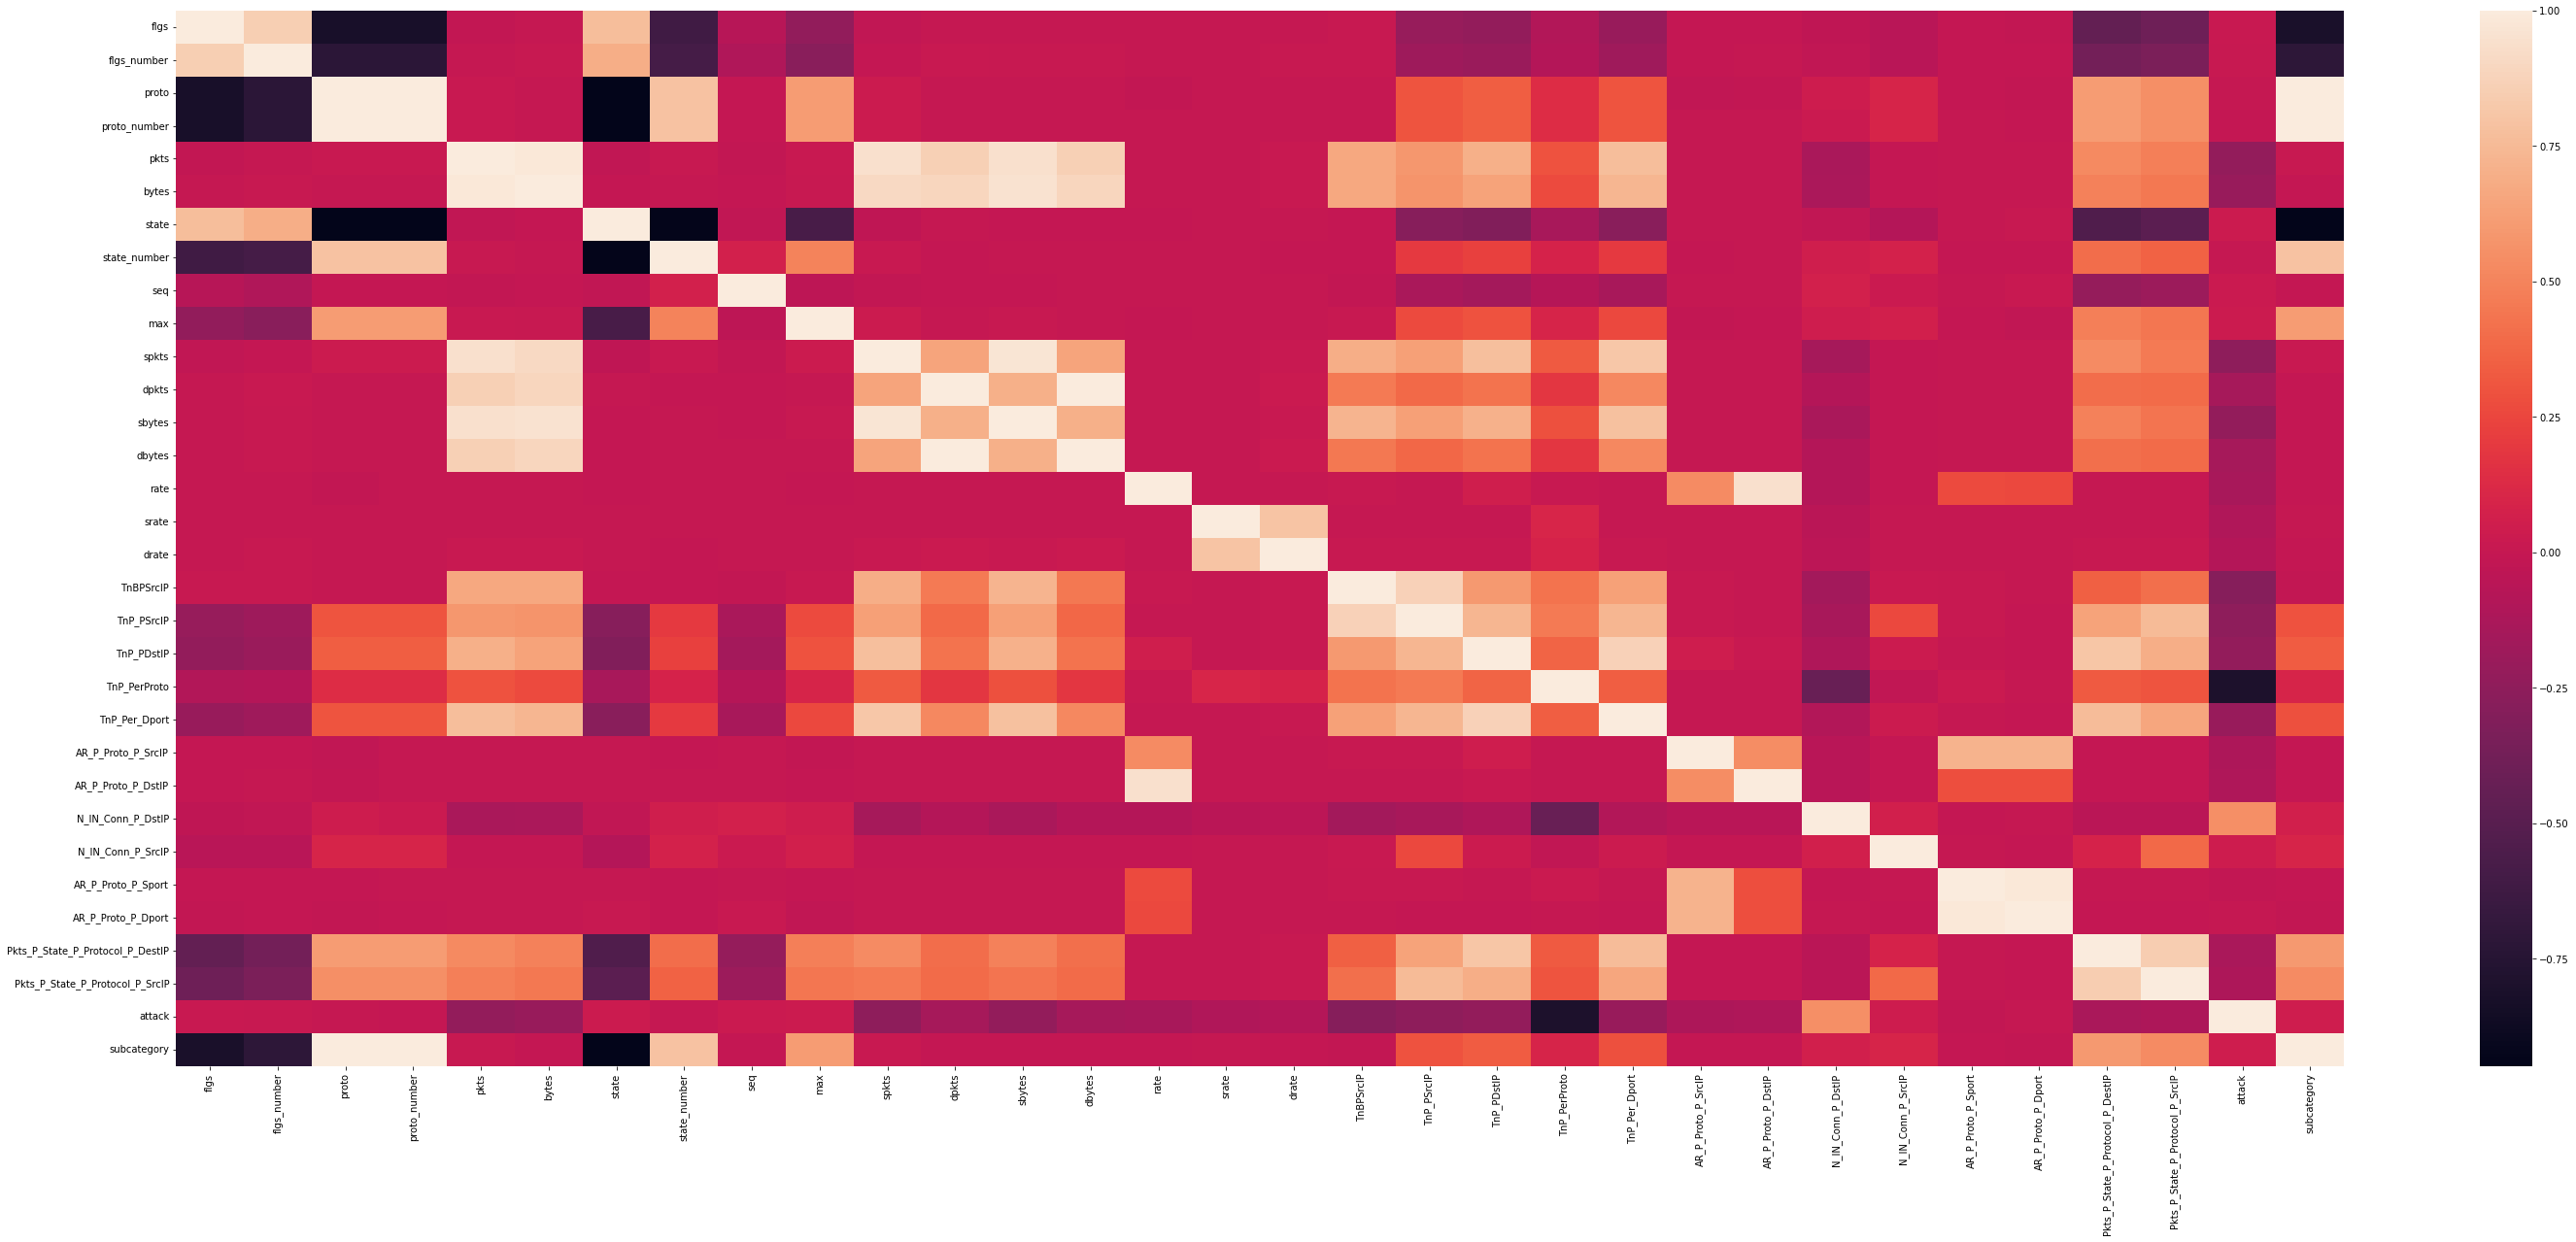

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(50,20))
sns.heatmap(corrdf2,)
plt.show()

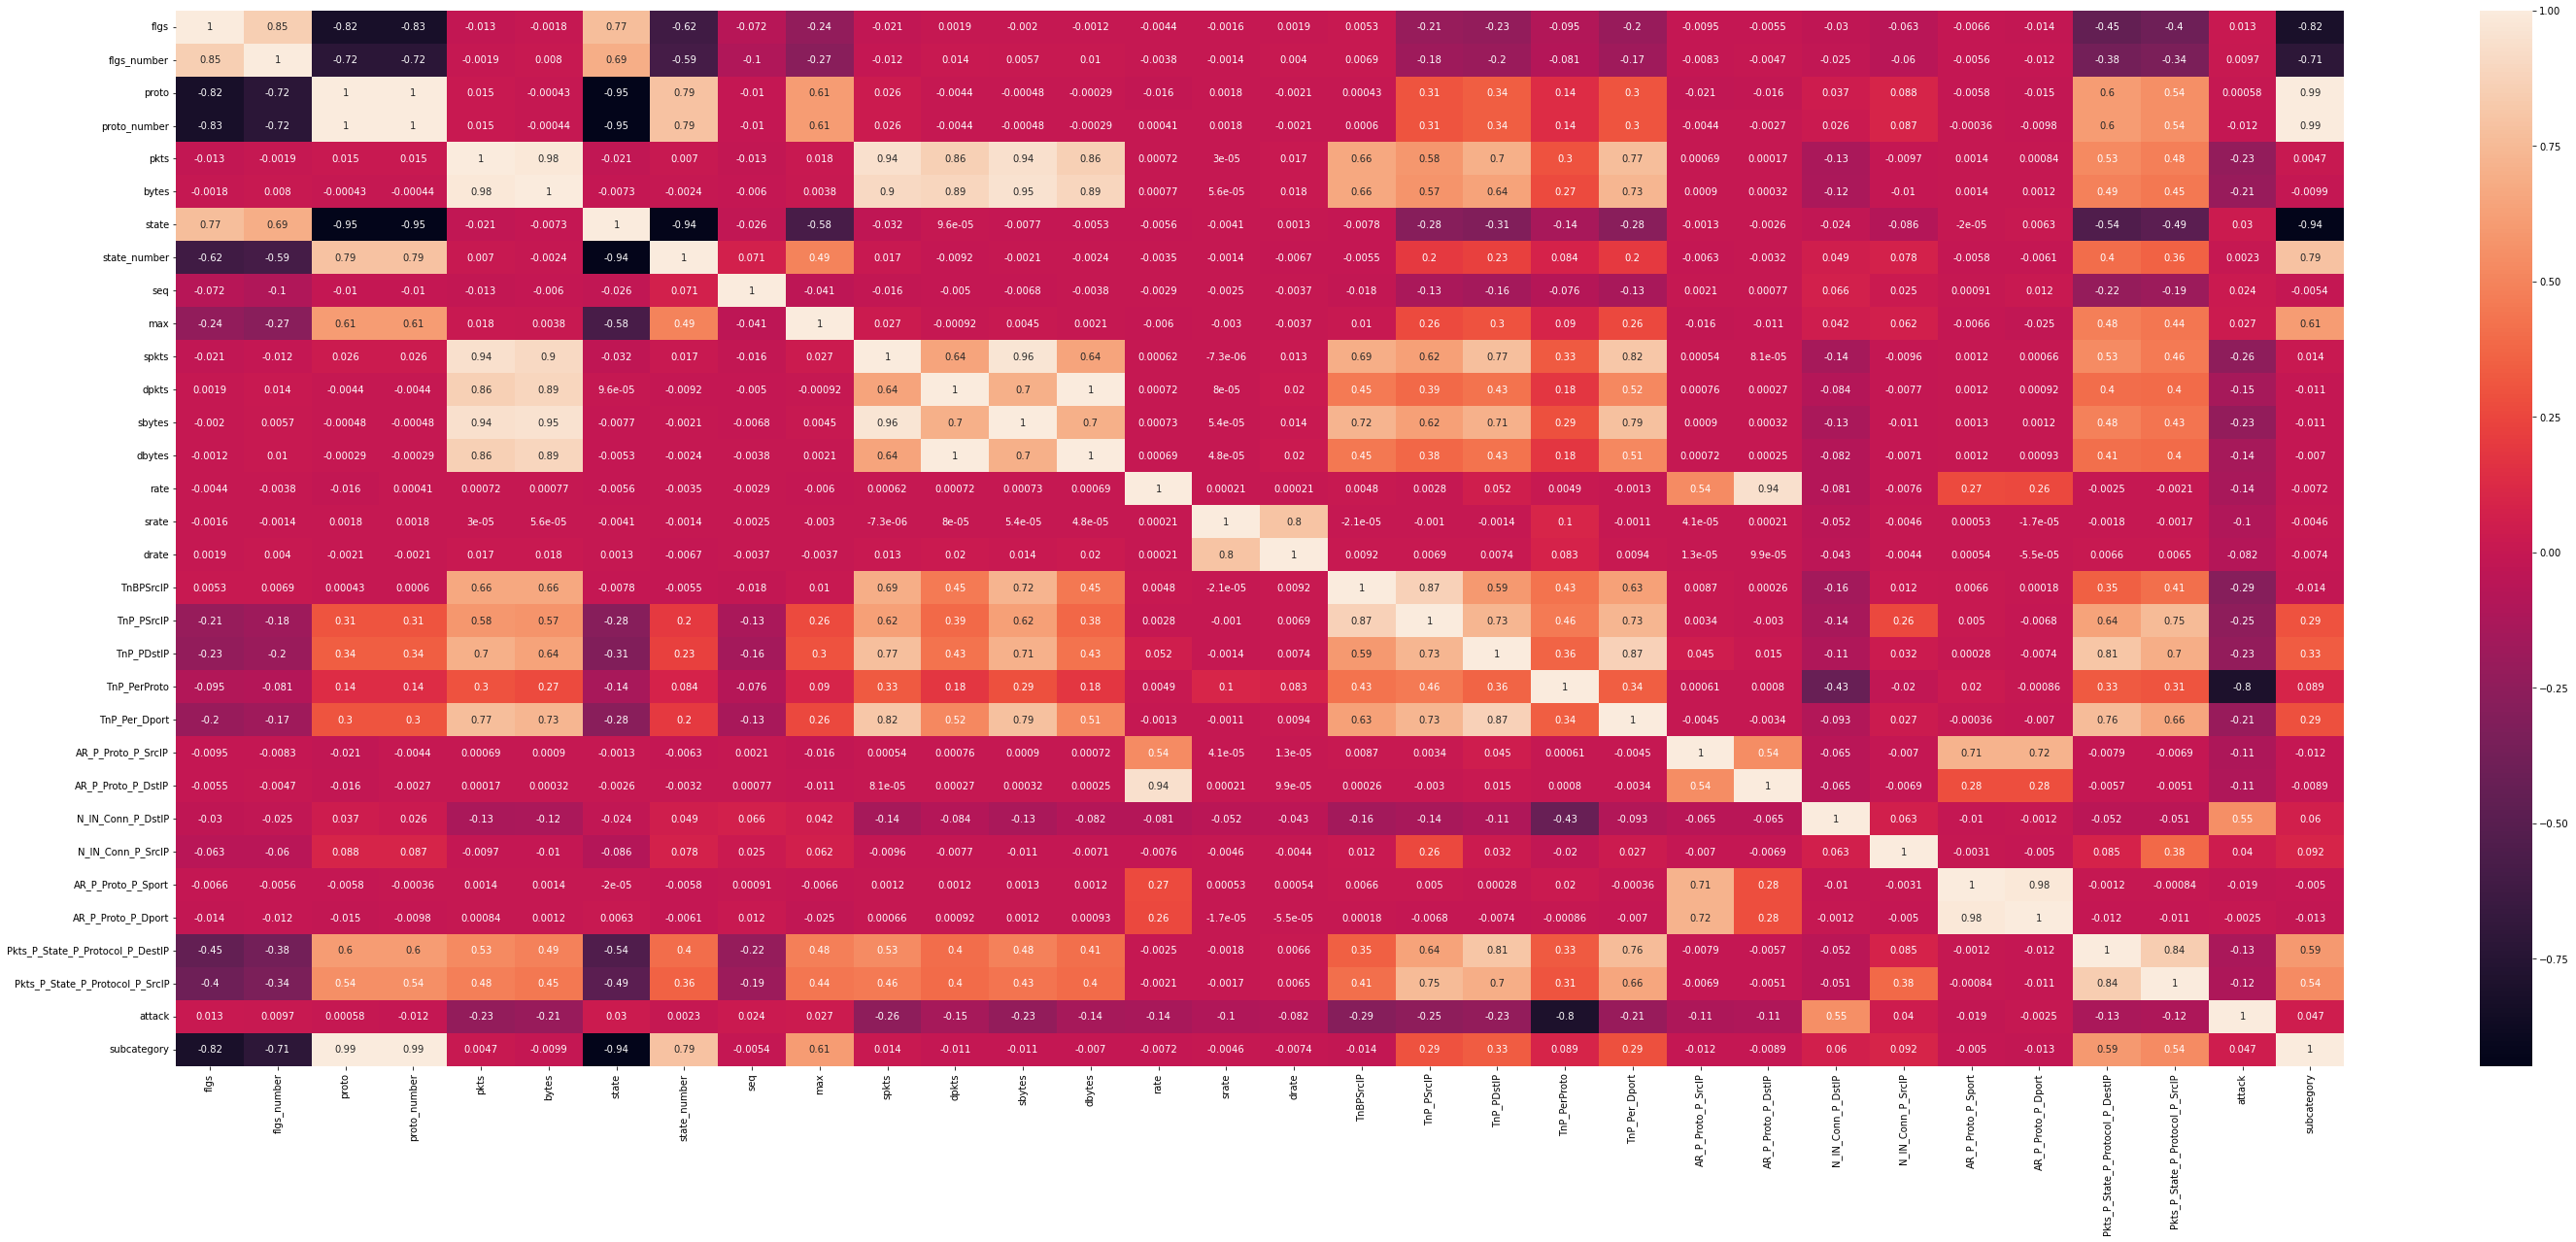

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(50,20))
sns.heatmap(corrdf2, annot=True)
plt.show()

In [82]:
st2 = set()
for i in range(len(corrdf2)):
    for j in range(i):
        if abs(corrdf2.iloc[i][j]) > 0.2:
            st2.add(corrdf2.columns[i])

In [83]:
len(st2)

27

In [84]:
st2

{'AR_P_Proto_P_Dport',
 'AR_P_Proto_P_DstIP',
 'AR_P_Proto_P_Sport',
 'AR_P_Proto_P_SrcIP',
 'N_IN_Conn_P_DstIP',
 'N_IN_Conn_P_SrcIP',
 'Pkts_P_State_P_Protocol_P_DestIP',
 'Pkts_P_State_P_Protocol_P_SrcIP',
 'TnBPSrcIP',
 'TnP_PDstIP',
 'TnP_PSrcIP',
 'TnP_PerProto',
 'TnP_Per_Dport',
 'attack',
 'bytes',
 'dbytes',
 'dpkts',
 'drate',
 'flgs_number',
 'max',
 'proto',
 'proto_number',
 'sbytes',
 'spkts',
 'state',
 'state_number',
 'subcategory'}

In [85]:
df2.head(2)

,flgs,flgs_number,proto,proto_number,sport,pkts,bytes,state,state_number,seq,...,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,subcategory
0,0,1,3,1,54110,10,1729,6,1,20,...,1.26889,1.21662,40,38,1.56093,1.21662,328,308,1,0
1,0,1,3,1,54112,10,1604,6,1,21,...,1.26889,1.21662,40,38,1.56107,1.21662,328,308,1,0


In [86]:
dfnew = df2.drop(st2,axis = 1)

In [87]:
dfnew

,flgs,sport,pkts,seq,rate,srate
0,0,54110,10,20,1.404840,0.780467
1,0,54112,10,21,1.404966,0.780536
2,0,54114,8,22,1.093573,0.624899
3,0,54116,8,23,1.093630,0.624931
4,0,54118,8,24,1.093669,0.624954
...,...,...,...,...,...,...
1927096,0,36242,2,3808,3.407434,0.000000
1927097,0,63574,2,3809,3.424622,0.000000
1927098,0,59485,2,3815,3.598469,0.000000
1927099,0,20844,2,3816,3.561990,0.000000


In [43]:
dfnew.shape ## by using this correlation concepts method we get the only 6 columns useful

(1927101, 6)

## b. apply variance concepts so that you will take only important columns into consideration 

In [90]:
# converting entire variables datatype to float datatypes
df2.select_dtypes(include=['int64']).columns

Index(['flgs_number', 'proto_number', 'pkts', 'bytes', 'state_number', 'seq',
       'spkts', 'dpkts', 'sbytes', 'dbytes', 'TnBPSrcIP', 'TnP_PSrcIP',
       'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'N_IN_Conn_P_DstIP',
       'N_IN_Conn_P_SrcIP', 'Pkts_P_State_P_Protocol_P_DestIP',
       'Pkts_P_State_P_Protocol_P_SrcIP', 'attack'],
      dtype='object')

In [101]:
df2['flgs_number'] = df2['flgs_number'].astype('float')
df2['proto_number'] = df2['proto_number'].astype('float')
df2['pkts'] = df2['pkts'].astype('float')
df2['bytes'] = df2['bytes'].astype('float')
df2['state_number'] = df2['state_number'].astype('float')
df2['seq'] = df2['seq'].astype('float')
df2['spkts'] = df2['spkts'].astype('float')
df2['dpkts'] = df2['dpkts'].astype('float')
df2['sbytes'] = df2['sbytes'].astype('float')
df2['TnBPSrcIP'] = df2['TnBPSrcIP'].astype('float')
df2['TnP_PSrcIP'] = df2['TnP_PSrcIP'].astype('float')
df2['TnP_PDstIP'] = df2['TnP_PDstIP'].astype('float')
df2['TnP_PerProto'] = df2['TnP_PerProto'].astype('float')
df2['TnP_Per_Dport'] = df2['TnP_Per_Dport'].astype('float')
df2['N_IN_Conn_P_DstIP'] = df2['N_IN_Conn_P_DstIP'].astype('float')
df2['N_IN_Conn_P_SrcIP'] = df2['N_IN_Conn_P_SrcIP'].astype('float')
df2['Pkts_P_State_P_Protocol_P_DestIP'] = df2['Pkts_P_State_P_Protocol_P_DestIP'].astype('float')
df2['Pkts_P_State_P_Protocol_P_SrcIP'] = df2['Pkts_P_State_P_Protocol_P_SrcIP'].astype('float')
df2['attack'] = df2['attack'].astype('float')
df2['flgs'] = df2['flgs'].astype('float')
df2['proto'] = df2['proto'].astype('float')
df2['dbytes'] = df2['dbytes'].astype('float')
df2['subcategory'] = df2['subcategory'].astype('float')


In [102]:
df2= df2.drop('sport', axis = 1)

In [121]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927101 entries, 0 to 1927100
Data columns (total 32 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   flgs                              float64
 1   flgs_number                       float64
 2   proto                             float64
 3   proto_number                      float64
 4   pkts                              float64
 5   bytes                             float64
 6   state                             float64
 7   state_number                      float64
 8   seq                               float64
 9   max                               float64
 10  spkts                             float64
 11  dpkts                             float64
 12  sbytes                            float64
 13  dbytes                            float64
 14  rate                              float64
 15  srate                             float64
 16  drate                             fl

In [124]:
df2[:3]

,flgs,flgs_number,proto,proto_number,pkts,bytes,state,state_number,seq,max,...,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,subcategory
0,0.0,1.0,3.0,1.0,10.0,1729.0,6.0,1.0,20.0,1.223599,...,1.26889,1.21662,40.0,38.0,1.56093,1.21662,328.0,308.0,1.0,0.0
1,0.0,1.0,3.0,1.0,10.0,1604.0,6.0,1.0,21.0,1.223769,...,1.26889,1.21662,40.0,38.0,1.56107,1.21662,328.0,308.0,1.0,0.0
2,0.0,1.0,3.0,1.0,8.0,1708.0,6.0,1.0,22.0,2.221694,...,1.26889,1.21662,40.0,38.0,1.24980,1.21662,328.0,308.0,1.0,0.0


In [125]:
df2.to_csv("df2modified_New.csv")

In [126]:
# Independent variable
X1 = df2.drop('attack',axis = 1)
X1[:5]

,flgs,flgs_number,proto,proto_number,pkts,bytes,state,state_number,seq,max,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,subcategory
0,0.0,1.0,3.0,1.0,10.0,1729.0,6.0,1.0,20.0,1.223599,...,700.0,1.26889,1.21662,40.0,38.0,1.56093,1.21662,328.0,308.0,0.0
1,0.0,1.0,3.0,1.0,10.0,1604.0,6.0,1.0,21.0,1.223769,...,700.0,1.26889,1.21662,40.0,38.0,1.56107,1.21662,328.0,308.0,0.0
2,0.0,1.0,3.0,1.0,8.0,1708.0,6.0,1.0,22.0,2.221694,...,700.0,1.26889,1.21662,40.0,38.0,1.24980,1.21662,328.0,308.0,0.0
3,0.0,1.0,3.0,1.0,8.0,1462.0,6.0,1.0,23.0,2.226655,...,700.0,1.26889,1.21662,40.0,38.0,1.24986,1.21662,328.0,308.0,0.0
4,0.0,1.0,3.0,1.0,8.0,1296.0,6.0,1.0,24.0,2.226195,...,700.0,1.26889,1.21662,40.0,38.0,1.24991,1.21662,328.0,308.0,0.0


In [127]:
# dependent variable
y1 = df2['attack']
y1

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
1927096    0.0
1927097    0.0
1927098    0.0
1927099    0.0
1927100    0.0
Name: attack, Length: 1927101, dtype: float64

In [128]:
var = VarianceThreshold(threshold = 10)
var.fit(X1)
var.get_support()

array([False, False, False, False,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False])

In [129]:
X1.columns # col names before applying variance threshold limit

Index(['flgs', 'flgs_number', 'proto', 'proto_number', 'pkts', 'bytes',
       'state', 'state_number', 'seq', 'max', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'srate', 'drate', 'TnBPSrcIP', 'TnP_PSrcIP',
       'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP',
       'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP',
       'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP',
       'subcategory'],
      dtype='object')

In [130]:
len(X1.columns) 

31

In [131]:
useful_columns = X1.columns[var.get_support()]
useful_columns

Index(['pkts', 'bytes', 'seq', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate',
       'srate', 'TnBPSrcIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto',
       'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP',
       'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP'],
      dtype='object')

In [132]:
len(useful_columns) # length of useful columns after applying variance

21

In [133]:
notuseful_columns = X1.columns[var.get_support()== False]
notuseful_columns

Index(['flgs', 'flgs_number', 'proto', 'proto_number', 'state', 'state_number',
       'max', 'drate', 'N_IN_Conn_P_DstIP', 'subcategory'],
      dtype='object')

In [134]:
X1 = X1.drop(notuseful_columns,axis =1)

In [135]:
X1

,pkts,bytes,seq,spkts,dpkts,sbytes,dbytes,rate,srate,TnBPSrcIP,...,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP
0,10.0,1729.0,20.0,6.0,4.0,963.0,766.0,1.404840,0.780467,56864.0,...,328.0,328.0,700.0,1.26889,1.21662,38.0,1.56093,1.21662,328.0,308.0
1,10.0,1604.0,21.0,6.0,4.0,838.0,766.0,1.404966,0.780536,56864.0,...,328.0,328.0,700.0,1.26889,1.21662,38.0,1.56107,1.21662,328.0,308.0
2,8.0,1708.0,22.0,5.0,3.0,1008.0,700.0,1.093573,0.624899,56864.0,...,328.0,328.0,700.0,1.26889,1.21662,38.0,1.24980,1.21662,328.0,308.0
3,8.0,1462.0,23.0,5.0,3.0,762.0,700.0,1.093630,0.624931,56864.0,...,328.0,328.0,700.0,1.26889,1.21662,38.0,1.24986,1.21662,328.0,308.0
4,8.0,1296.0,24.0,5.0,3.0,596.0,700.0,1.093669,0.624954,56864.0,...,328.0,328.0,700.0,1.26889,1.21662,38.0,1.24991,1.21662,328.0,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927096,2.0,397.0,3808.0,1.0,1.0,106.0,291.0,3.407434,0.000000,48697.0,...,4.0,142.0,122.0,9.49326,6.83201,74.0,6.81487,9.49326,4.0,122.0
1927097,2.0,297.0,3809.0,1.0,1.0,106.0,191.0,3.424622,0.000000,48697.0,...,4.0,142.0,122.0,9.49326,6.83201,74.0,6.84924,9.49326,4.0,122.0
1927098,2.0,337.0,3815.0,1.0,1.0,100.0,237.0,3.598469,0.000000,48697.0,...,2.0,142.0,122.0,9.49326,7.19694,74.0,7.19694,9.49326,2.0,122.0
1927099,2.0,936.0,3816.0,1.0,1.0,91.0,845.0,3.561990,0.000000,48697.0,...,4.0,142.0,122.0,9.49326,7.12689,74.0,7.12398,9.49326,4.0,122.0


* Q 3 . Use this data for modeling 
   o Create 
     a. Logistic regression 
     b. Random Forest 
     c. Decision Tree 
* Note : Accuracy should be above 90%


#      a. Logistic regression 

In [136]:
import numpy as np 
import pandas as pd

df8 = pd.read_csv("df2modified_New.csv")
df8.head()

,Unnamed: 0,flgs,flgs_number,proto,proto_number,pkts,bytes,state,state_number,seq,...,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,subcategory
0,0,0.0,1.0,3.0,1.0,10.0,1729.0,6.0,1.0,20.0,...,1.26889,1.21662,40.0,38.0,1.56093,1.21662,328.0,308.0,1.0,0.0
1,1,0.0,1.0,3.0,1.0,10.0,1604.0,6.0,1.0,21.0,...,1.26889,1.21662,40.0,38.0,1.56107,1.21662,328.0,308.0,1.0,0.0
2,2,0.0,1.0,3.0,1.0,8.0,1708.0,6.0,1.0,22.0,...,1.26889,1.21662,40.0,38.0,1.24980,1.21662,328.0,308.0,1.0,0.0
3,3,0.0,1.0,3.0,1.0,8.0,1462.0,6.0,1.0,23.0,...,1.26889,1.21662,40.0,38.0,1.24986,1.21662,328.0,308.0,1.0,0.0
4,4,0.0,1.0,3.0,1.0,8.0,1296.0,6.0,1.0,24.0,...,1.26889,1.21662,40.0,38.0,1.24991,1.21662,328.0,308.0,1.0,0.0


In [137]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927101 entries, 0 to 1927100
Data columns (total 33 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Unnamed: 0                        int64  
 1   flgs                              float64
 2   flgs_number                       float64
 3   proto                             float64
 4   proto_number                      float64
 5   pkts                              float64
 6   bytes                             float64
 7   state                             float64
 8   state_number                      float64
 9   seq                               float64
 10  max                               float64
 11  spkts                             float64
 12  dpkts                             float64
 13  sbytes                            float64
 14  dbytes                            float64
 15  rate                              float64
 16  srate                             fl

In [138]:
X= df8.drop('attack',axis = 1).values

X[:3]

array([[0.000000e+00, 0.000000e+00, 1.000000e+00, 3.000000e+00,
        1.000000e+00, 1.000000e+01, 1.729000e+03, 6.000000e+00,
        1.000000e+00, 2.000000e+01, 1.223599e+00, 6.000000e+00,
        4.000000e+00, 9.630000e+02, 7.660000e+02, 1.404840e+00,
        7.804670e-01, 4.682800e-01, 5.686400e+04, 3.080000e+02,
        3.280000e+02, 3.280000e+02, 7.000000e+02, 1.268890e+00,
        1.216620e+00, 4.000000e+01, 3.800000e+01, 1.560930e+00,
        1.216620e+00, 3.280000e+02, 3.080000e+02, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 1.000000e+00, 3.000000e+00,
        1.000000e+00, 1.000000e+01, 1.604000e+03, 6.000000e+00,
        1.000000e+00, 2.100000e+01, 1.223769e+00, 6.000000e+00,
        4.000000e+00, 8.380000e+02, 7.660000e+02, 1.404966e+00,
        7.805360e-01, 4.683220e-01, 5.686400e+04, 3.080000e+02,
        3.280000e+02, 3.280000e+02, 7.000000e+02, 1.268890e+00,
        1.216620e+00, 4.000000e+01, 3.800000e+01, 1.561070e+00,
        1.216620e+00, 3.280000e+02, 3.0

In [139]:
y=df8["attack"]
y                            #dependent variable

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
1927096    0.0
1927097    0.0
1927098    0.0
1927099    0.0
1927100    0.0
Name: attack, Length: 1927101, dtype: float64

In [140]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
import matplotlib.pyplot as plt

In [141]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=200) #trainingsize = 80% test = 20%
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1541680, 32) (1541680,)
Test set: (385421, 32) (385421,)


In [142]:
from sklearn.linear_model import LogisticRegression # use LogisticRegression
LR = LogisticRegression(solver='saga')
LR.fit(X_train,y_train) #training 
LR

C:\Users\omgha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='saga')

In [143]:
yhat = LR.predict(X_test)#only questions passed and answers are saved for evaluation
yhat

array([1., 1., 1., ..., 1., 1., 1.])

In [144]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:5]

array([[4.56791637e-03, 9.95432084e-01],
       [9.31320667e-05, 9.99906868e-01],
       [1.38693768e-09, 9.99999999e-01],
       [1.82338203e-05, 9.99981766e-01],
       [1.24847007e-08, 9.99999988e-01]])

In [145]:
from sklearn.metrics import f1_score    ## our model give us 99 accuracy 
f1_score(y_test, yhat) #actualvale,predvalue  

0.9996236405637604

## b.Random Forest 

In [146]:
X_train.shape

(1541680, 32)

In [147]:
X_test.shape

(385421, 32)

In [148]:
y_train

72934      1.0
887942     1.0
172148     1.0
1088745    1.0
615560     1.0
          ... 
1226423    1.0
781098     1.0
522052     1.0
12905      1.0
1574682    1.0
Name: attack, Length: 1541680, dtype: float64

In [149]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [150]:
X_train

array([[-1.60082307,  1.19940925,  0.92544331, ..., -1.01019154,
        -0.84171047, -0.97499097],
       [-0.13610066,  1.19940925,  0.92544331, ..., -0.27555942,
        -0.96782907, -0.97499097],
       [-1.42251688, -0.8391144 , -0.73530716, ..., -1.07040729,
        -1.17592477, -0.97499097],
       ...,
       [-0.79367369,  1.19940925,  0.92544331, ..., -0.95800456,
        -0.78705907, -0.97499097],
       [-1.70870645,  0.79170452,  5.90769473, ..., -0.42007721,
        -0.22372931, -0.97499097],
       [ 1.09810007, -0.8391144 , -0.73530716, ...,  0.68387815,
         0.64648905,  1.01132937]])

In [151]:
X_test

array([[-1.14244314,  1.19940925,  0.92544331, ..., -0.07484026,
        -0.77865117, -0.97499097],
       [-0.66490519,  1.19940925,  0.92544331, ..., -0.55656624,
        -0.36666373, -0.97499097],
       [ 0.67214859, -0.8391144 , -0.73530716, ...,  0.38279942,
        -0.35405187,  1.01132937],
       ...,
       [ 1.61155481, -0.8391144 , -0.73530716, ...,  0.24631039,
         0.47412696,  1.01132937],
       [ 0.95597486, -0.8391144 , -0.73530716, ...,  0.04559123,
         0.26392929,  1.01132937],
       [ 1.24789926, -0.8391144 , -0.73530716, ...,  0.84846786,
         1.10471998,  1.01132937]])

In [152]:
# Fitting the classifier into the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')
classifier.fit(X_train,y_train)#question,answers 

RandomForestClassifier(criterion='entropy', n_estimators=5)

In [153]:
# Predicting the test set results
y_Pred = classifier.predict(X_test)   #examination only question are given

In [154]:
y_Pred

array([1., 1., 1., ..., 1., 1., 1.])

In [155]:
from sklearn.metrics import f1_score
f1_score(y_test,y_Pred)    #actual,predict

1.0

## c. Decision Tree 

In [156]:
from sklearn.tree import DecisionTreeClassifier
DTC1 = DecisionTreeClassifier(criterion='entropy')
DTC1

DecisionTreeClassifier(criterion='entropy')

In [157]:
#Training 
DTC1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [158]:
y_hat = DTC1.predict(X_test) #y_hat are my predicted answers

In [159]:
y_hat

array([1., 1., 1., ..., 1., 1., 1.])

In [160]:
from sklearn import metrics
print(f"my accuracy is {metrics.accuracy_score(y_test,y_hat)}")

my accuracy is 1.0
